# MCDonalds Case Study

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading dataset
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [6]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [7]:
dimensions = df.shape
print(dimensions)

(1453, 15)


In [8]:
# Assuming mcdonalds is a DataFrame
MD_x = df.iloc[:, 0:11].copy()

In [9]:
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

In [10]:
# Calculate column means and round to two decimal places
col_means = np.round(MD_x.mean(), 2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


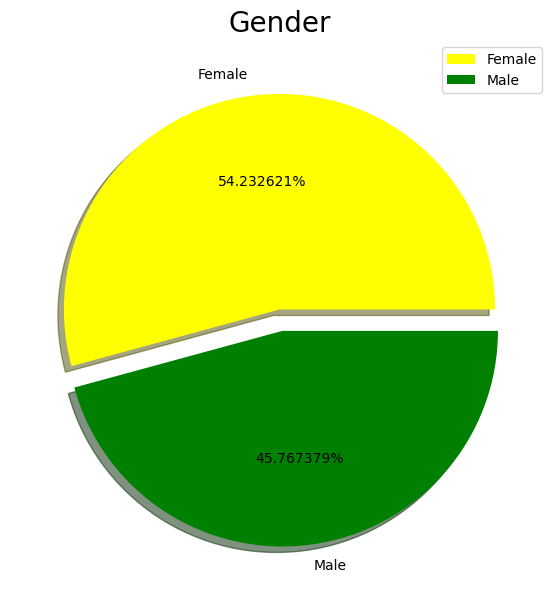

In [11]:
#socio-demographs (Age&Gender) EDA

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['yellow','green']
explode = [0,0.1]
plt.rcParams['figure.figsize'] = (7,7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

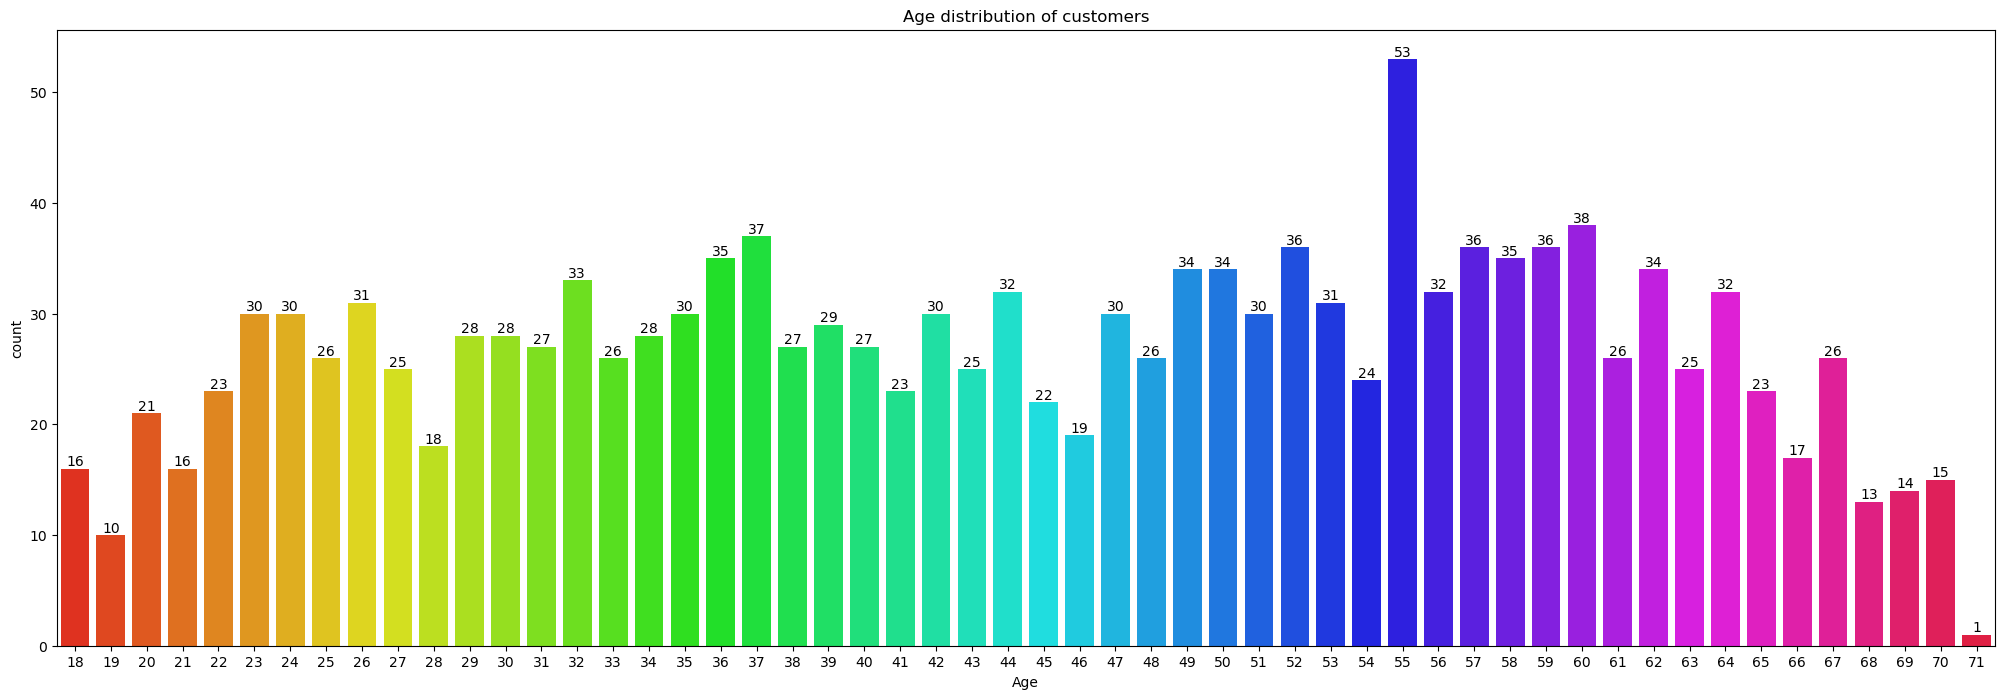

In [12]:
import seaborn as sns
#Age
plt.rcParams['figure.figsize'] = (25,8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

Mcdonalds recive more customers of age between 50-60 and 35-40

In [13]:
#Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

tag = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in tag:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [15]:
#Considering only first 11 attributes
df_eleven = df.loc[:,tag]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [16]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,tag].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [42]:
from sklearn.decomposition import PCA

In [13]:
# Assuming MD_x is the binary matrix obtained previously
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [14]:
# Print summary
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("\nSummary:")
print(pd.DataFrame(pca.components_, columns=MD_x.columns))

Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Summary:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.0

In [44]:
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)  
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [15]:
print("Principal Components:")
print(pd.DataFrame(pca.components_, columns=MD_x.columns).round(1))
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_.round(1))

Principal Components:
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0    -0.5        -0.2   -0.0        0.1     0.3  -0.1   -0.3   -0.5   
1     0.4         0.0    0.0       -0.0    -0.1  -0.1   -0.6    0.3   
2    -0.3        -0.1   -0.0       -0.3    -0.8  -0.1   -0.1   -0.3   
3     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
4    -0.3         0.3    0.1       -0.1     0.4   0.1   -0.1   -0.2   
5     0.2        -0.3   -0.4       -0.4     0.2  -0.6   -0.1   -0.1   
6    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
7     0.0        -0.1    0.4        0.6    -0.1  -0.6    0.1   -0.1   
8     0.6        -0.0    0.4       -0.2    -0.0   0.2    0.1   -0.6   
9    -0.1        -0.7   -0.1       -0.0     0.0   0.2    0.4    0.1   
10    0.0        -0.5    0.1        0.3     0.0   0.3   -0.5    0.0   

    expensive  healthy  disgusting  
0         0.3     -0.2         0.4  
1         0.6      0.1        -0.1  
2         0.0 

In [16]:
# Assuming MD_pca is the result of PCA.fit_transform
pca_result = pca.transform(MD_x)

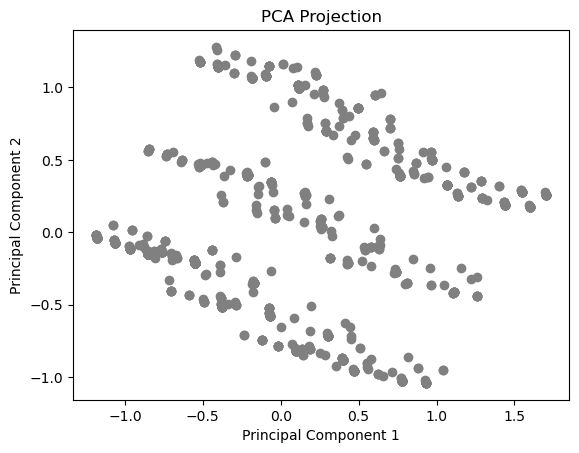

In [17]:
# Plotting the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [46]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state

In [18]:
# Set the random seed
np.random.seed(1234)

In [19]:
# The number of clusters range from 2 to 8
n_clusters_range = range(2, 9)

In [20]:
# Number of repetitions for KMeans
n_rep = 10

In [21]:
# Create a random state object for reproducibility
random_state = check_random_state(1234)

In [22]:
# List to store KMeans models
kmeans_models = []

In [23]:
# Perform KMeans clustering with different cluster numbers
for n_clusters in n_clusters_range:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=random_state)
    kmeans_model.fit(MD_x)  # Replace MD_x with your actual data
    kmeans_models.append(kmeans_model)

In [33]:
def plot_elbow_curve(n_clusters_range, inertia_values):
    plt.plot(n_clusters_range, inertia_values, marker='o')
    plt.xlabel('Number of segments')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.show()

In [34]:
# Assuming kmeans_models is a list of KMeans models from the previous code
inertia_values = [kmeans.inertia_ for kmeans in kmeans_models]

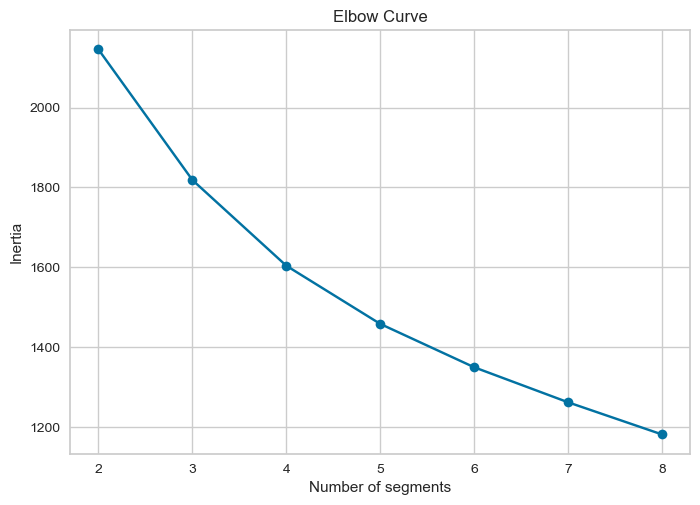

In [35]:
# Call the function to plot the elbow curve
plot_elbow_curve(n_clusters_range, inertia_values)

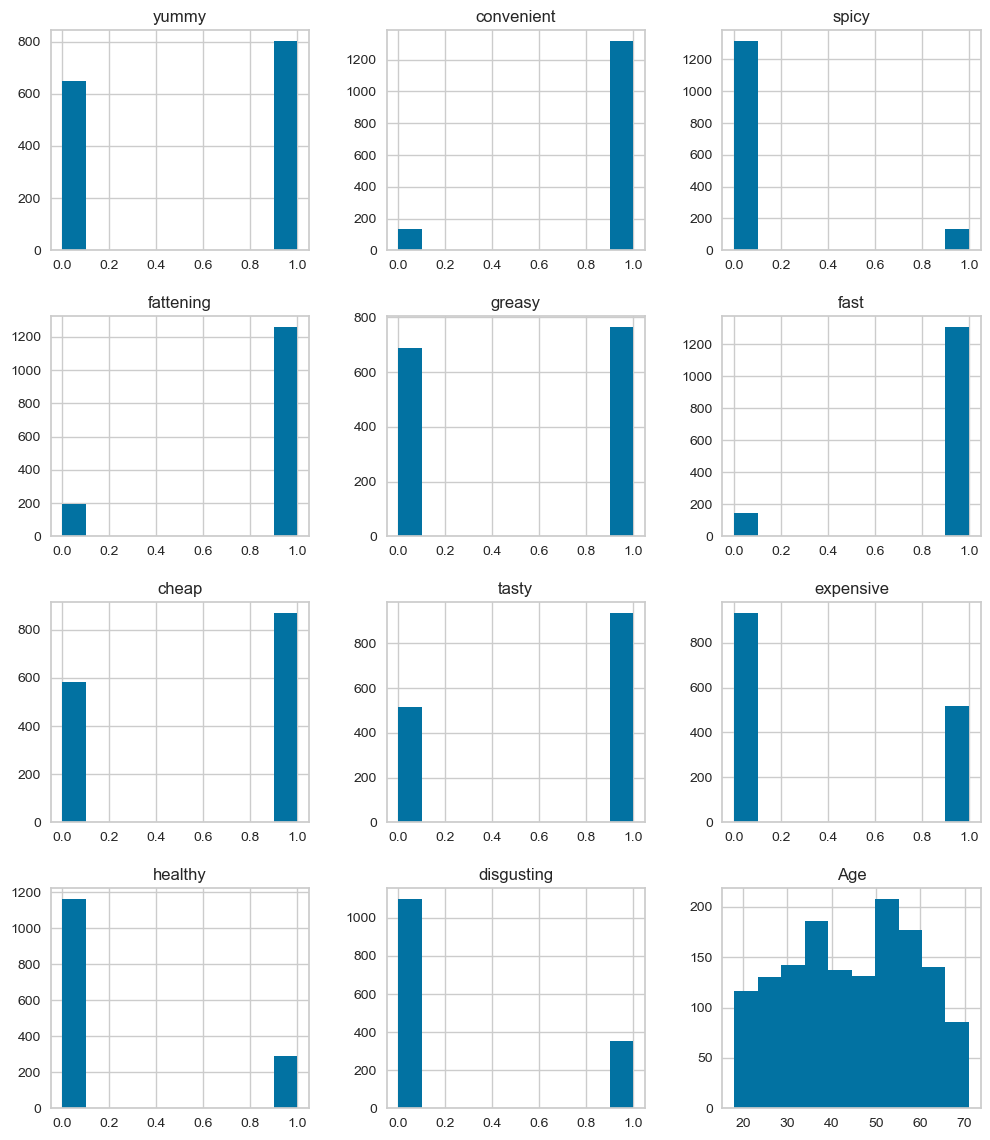

In [36]:
#Histogram of the each attribute
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0).fit(df_eleven)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 0 0 ... 0 1 3]
1603.0604440558916
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [40]:
#size of all clusters
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

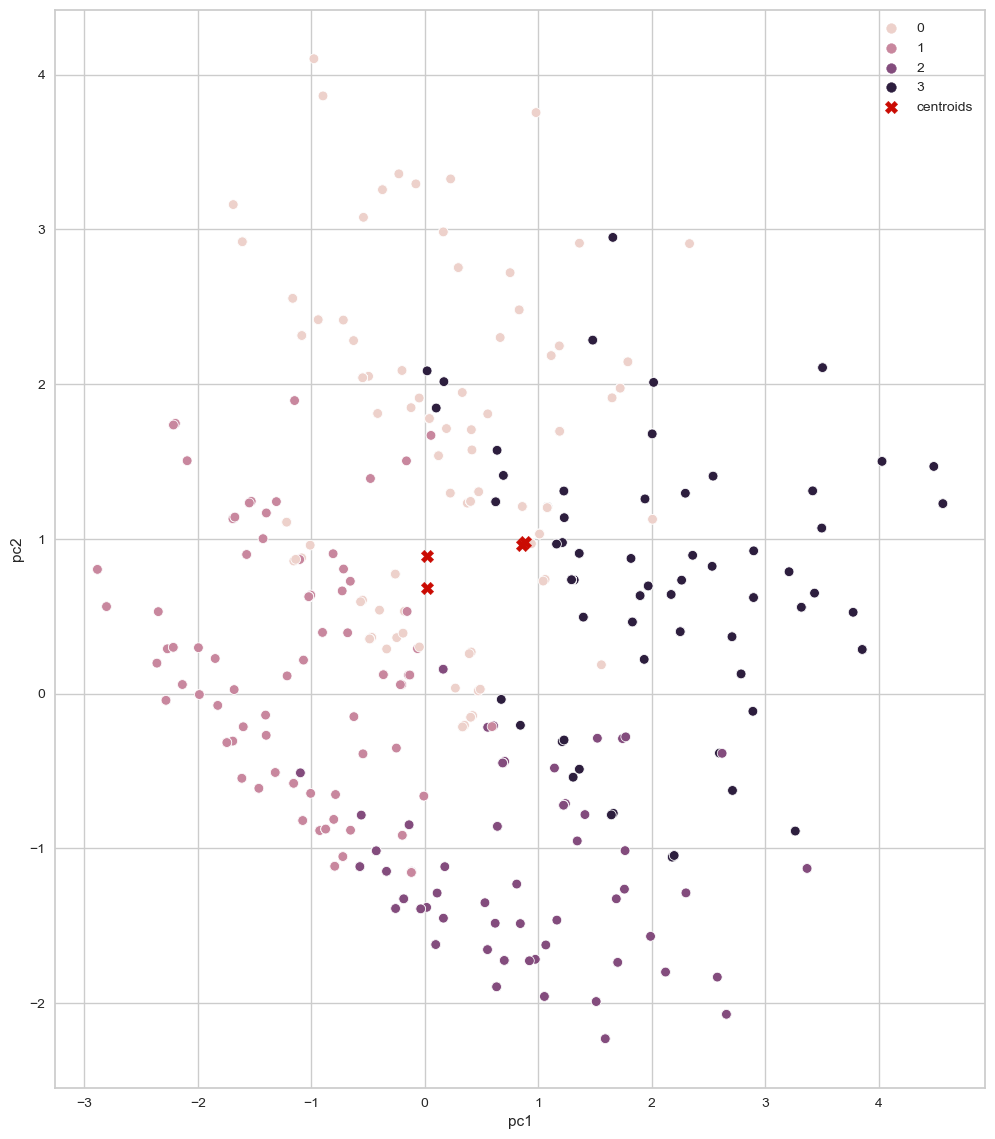

In [45]:
#visulazing clusters
sns.scatterplot(data=pf ,x='pc1', y='pc2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label='centroids')
plt.legend()
plt.show()